# Southern Water Corp Statistics Analysis

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

## Descriptive Statistics
i. Import each of the two data sources and store them into their individual DataFrames. 

ii. Print descriptive statistics for each of the DataFrames

In [2]:
df_raw=pd.read_csv('DF_Raw_Data.csv')
df_std=pd.read_csv('DF_Rolling_Stdev.csv')
df_std.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

In [3]:
df_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


---------------------------------------------------------------------------

In [4]:
df_std.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


In [ ]:
# dataframe_stdev is more clustered around the mean
# the highest mean and variation comes from Pump Torque

### Create box plot and line plot 

i)  create a boxplot visualising variation of the data.

ii) create a lineplot visualising changes over time of the data.

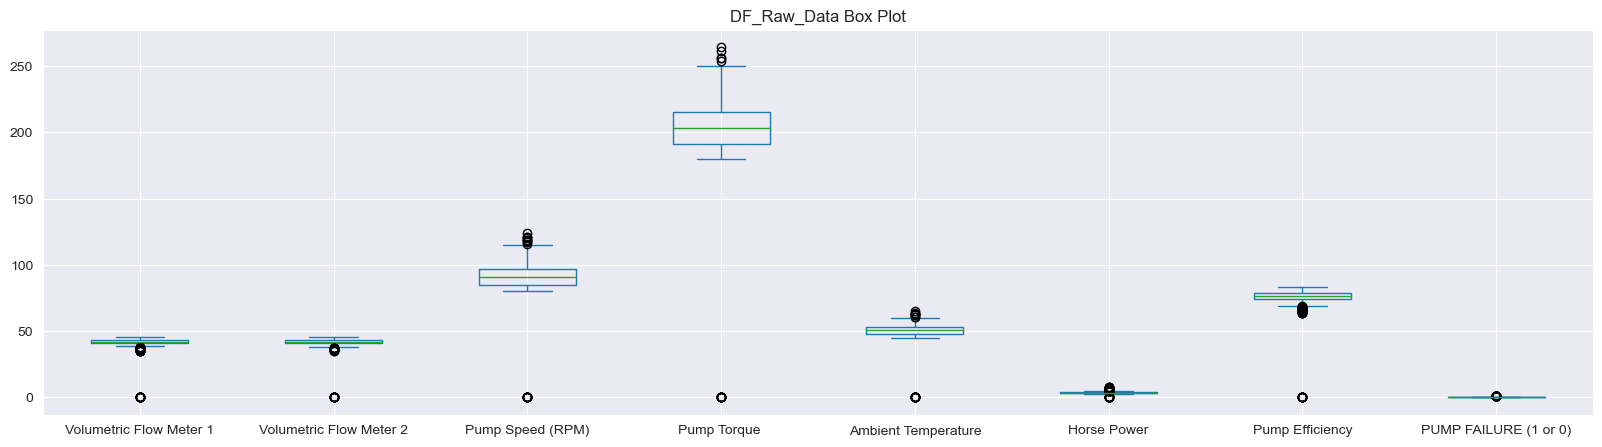

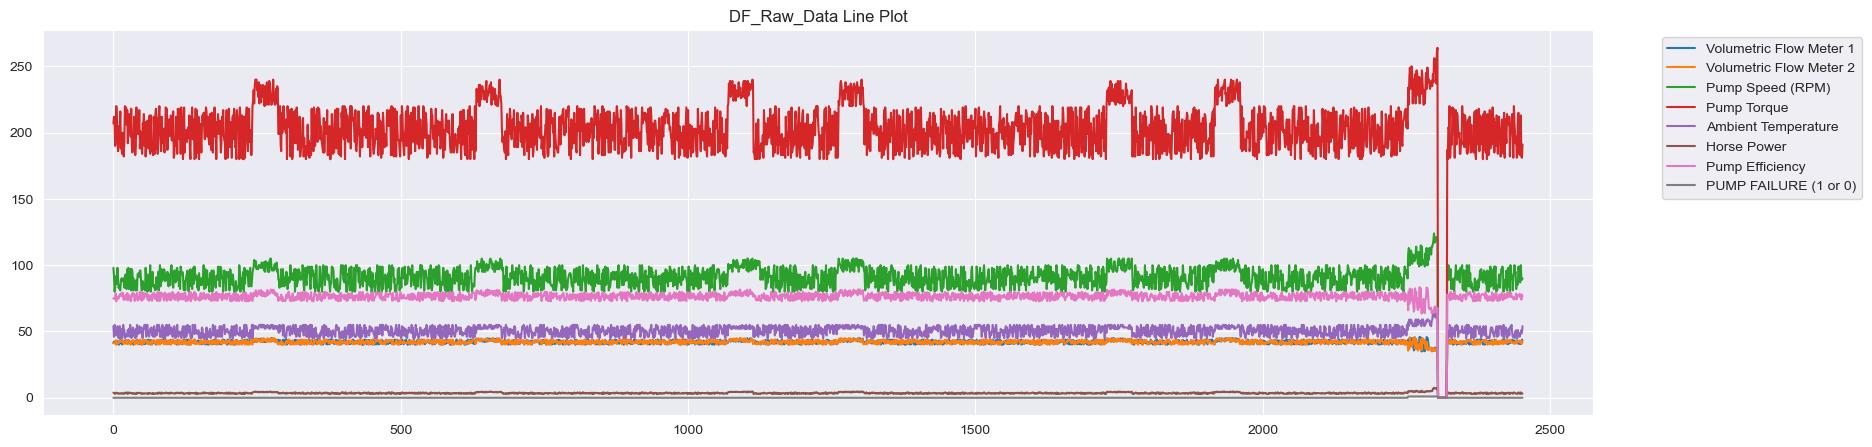

In [69]:
df_raw.plot(kind='box',)
plt.title('DF_Raw_Data Box Plot')
df_raw.plot(kind='line')
plt.title('DF_Raw_Data Line Plot')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.show()

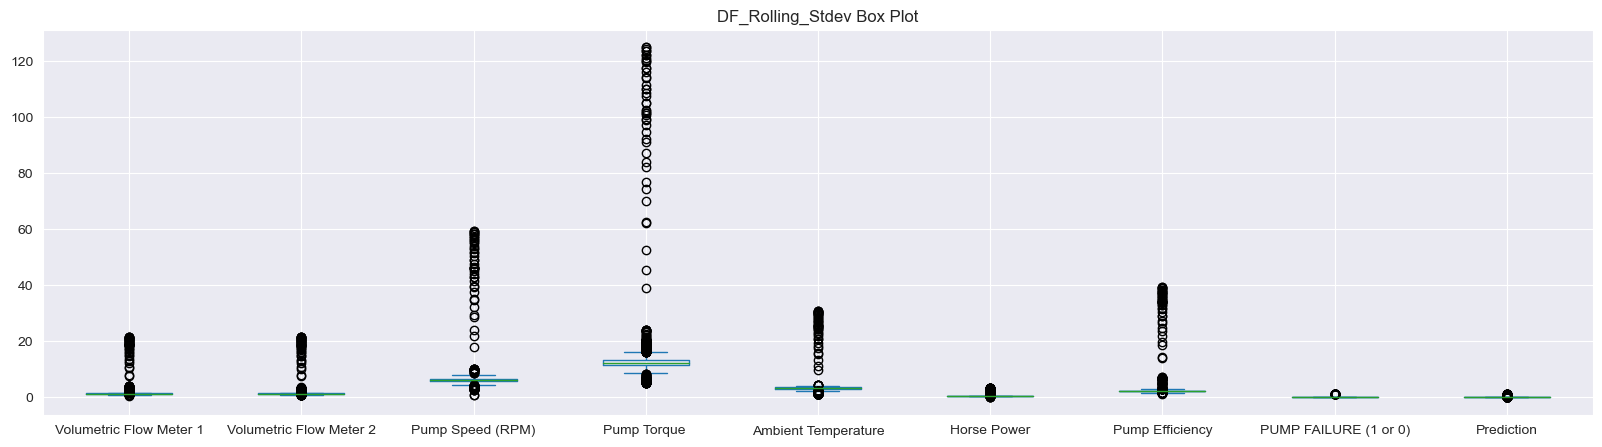

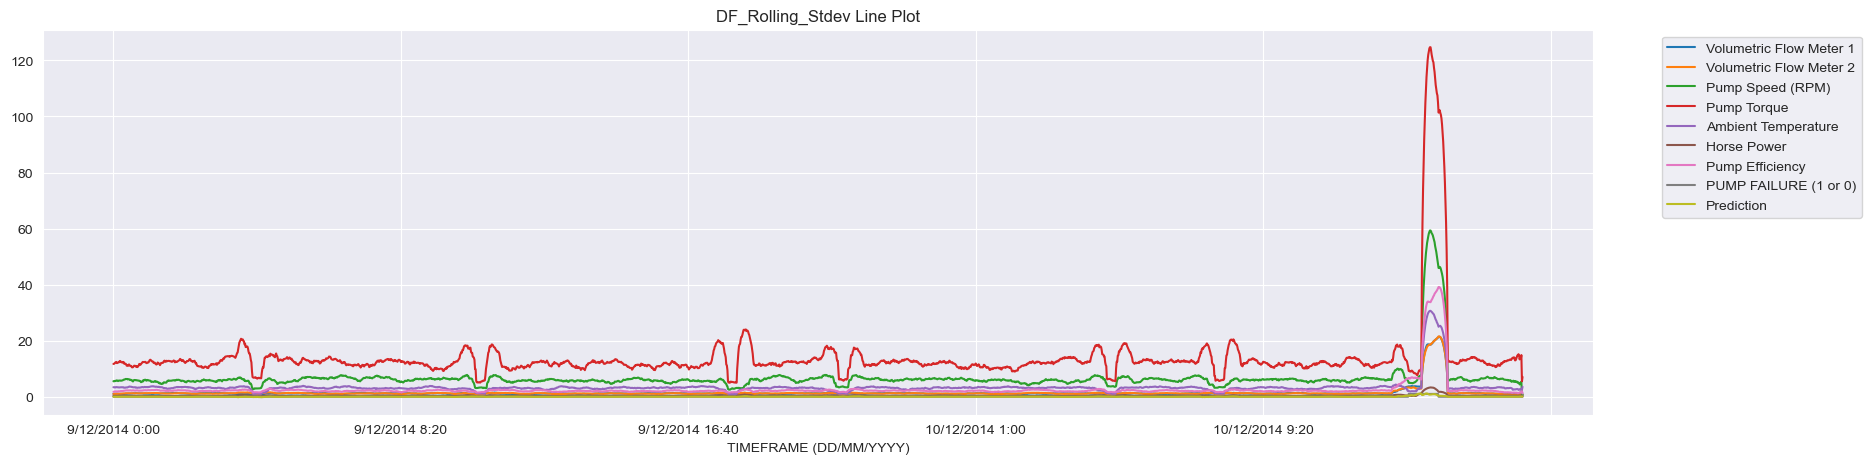

In [70]:
df_std.plot(kind='box',)
plt.title('DF_Rolling_Stdev Box Plot')
df_std.plot(kind='line')
plt.title('DF_Rolling_Stdev Line Plot')
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.show()

Outliers in boxplots and abnormalities showing clearly in both raw and df_std data at the same time stamp

### Filtered DataFrames with Box Plots

the datasets contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
To visualise see differences in the overall populations of Pre-Failure vs. Post Failure, separate datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 

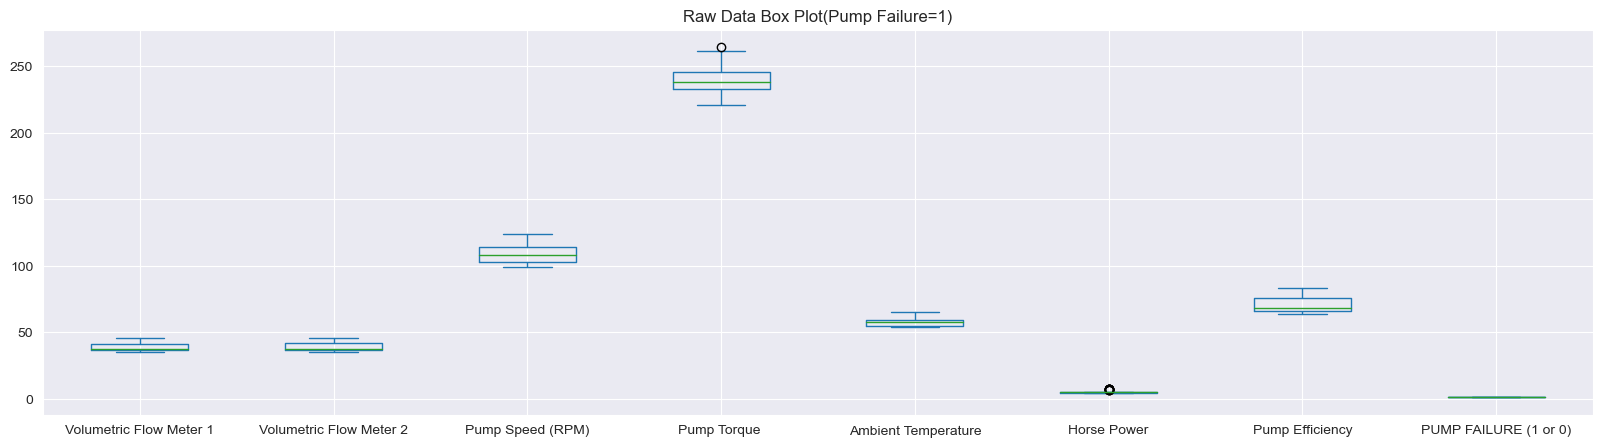

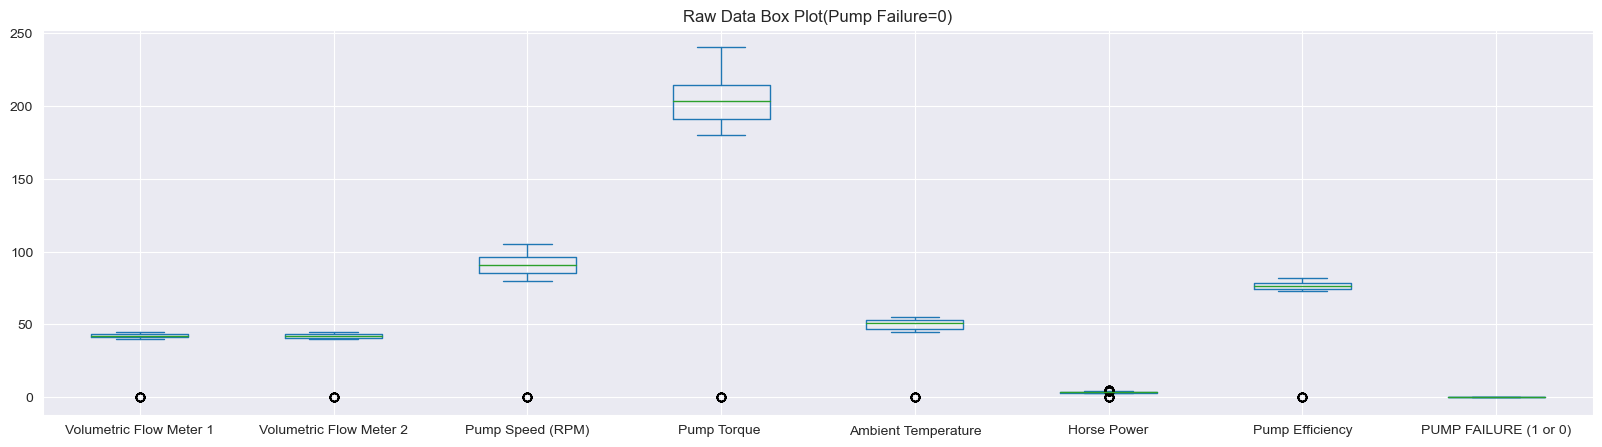

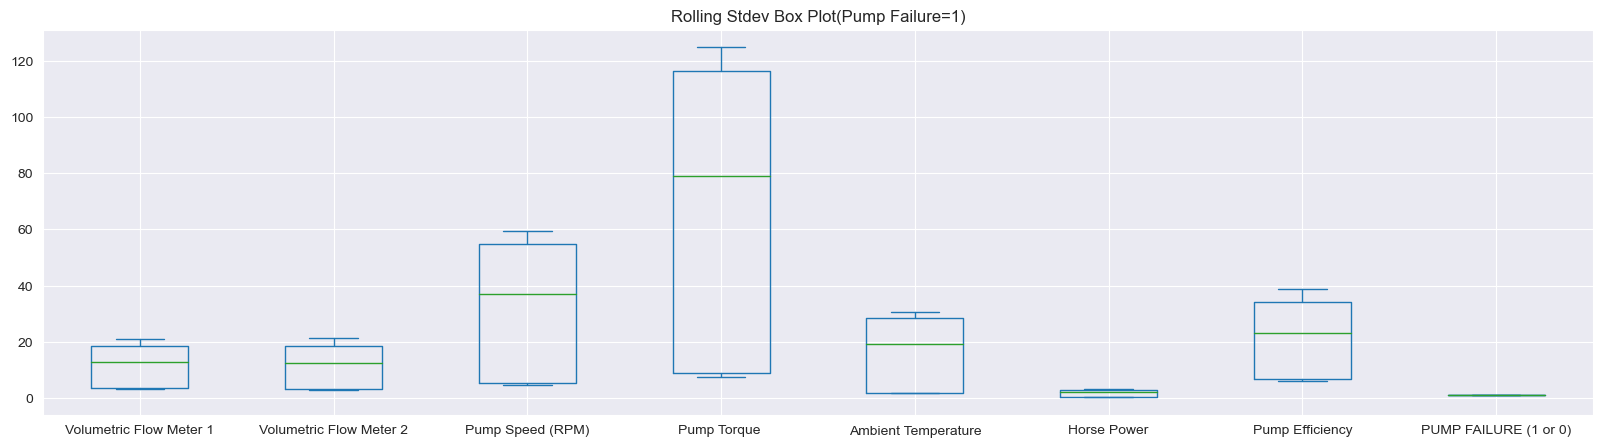

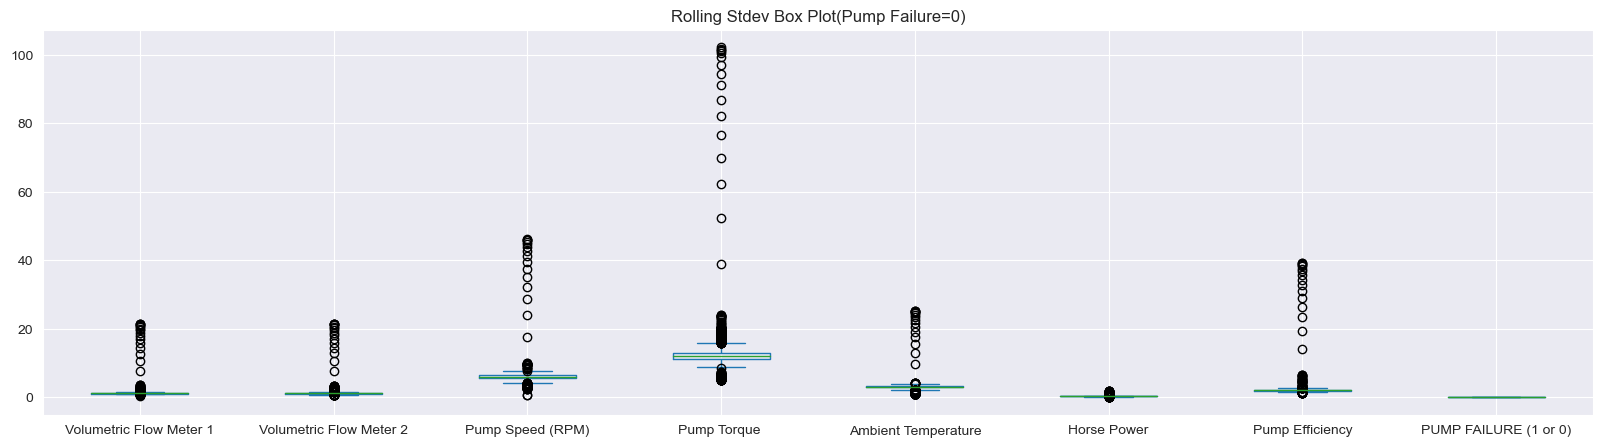

In [8]:
pf_raw1=df_raw['PUMP FAILURE (1 or 0)']==1
pn_raw1=df_raw['PUMP FAILURE (1 or 0)']==0
pf_raw2=df_std['PUMP FAILURE (1 or 0)']==1
pn_raw2=df_std['PUMP FAILURE (1 or 0)']==0
df_raw[pf_raw1].plot(kind='box')
plt.title('Raw Data Box Plot (Pump Failure=1)')
df_raw[pn_raw1].plot(kind='box')
plt.title('Raw Data Box Plot (Pump Failure=0)')
df_std[pf_raw2].plot(kind='box')
plt.title('Rolling Stdev Box Plot (Pump Failure=1)')
df_std[pn_raw2].plot(kind='box')
plt.title('Rolling Stdev Box Plot (Pump Failure=0)')
plt.show()

The size of the IQR enlargens when Pump Failure occurs.
box plots show a clear signature difference between that of normal behaviour and that of Failure with pump, Pump Speed, Pump Torque, Pump Efficiency showing the 3 largest variances.

### Create Quartiles

Create two new variables called Q1 and Q3 

i) Q1 containS the 25th percentile for all columns in the DataFrame. Q3 containS the 75th percentile  for all the columns in the DataFrame.

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame.

In [9]:
Q1=df_raw.quantile(0.25)
Q3=df_raw.quantile(0.75)
IQR=Q3-Q1
IQR


Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

### Identify Outliers

Remove outliers.

i) Define two new variables, Lower_Limit and Upper_Limit 
 Lower_Limit = Q1 - 1.5 * IQR 
 Upper_Limit = Q3 + 1.5 * IQR
   
ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the DataFrame to include only the outliers. 

In [10]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df_raw [((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1) ]

outliers.shape

/var/folders/cz/0hvc6rf521lfbd_bs4kbq07c0000gn/T/ipykernel_10170/386024740.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df_raw [((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1) ]


(95, 10)

### Create a box plot without outliers

i) Create a new DataFrame called no_outliers and using the ~ operator, remove all the outliers from the DataFrame
ii) Using the no_outliers dataframe, create two box plots as per below:
    A boxplot when PUMP FAILURE is 1 (Failure) 
    A boxplot when PUMP FAILURE is 0 (Normal Behaviour) 

/var/folders/cz/0hvc6rf521lfbd_bs4kbq07c0000gn/T/ipykernel_10170/1402174074.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers=df_raw [~((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1) ]


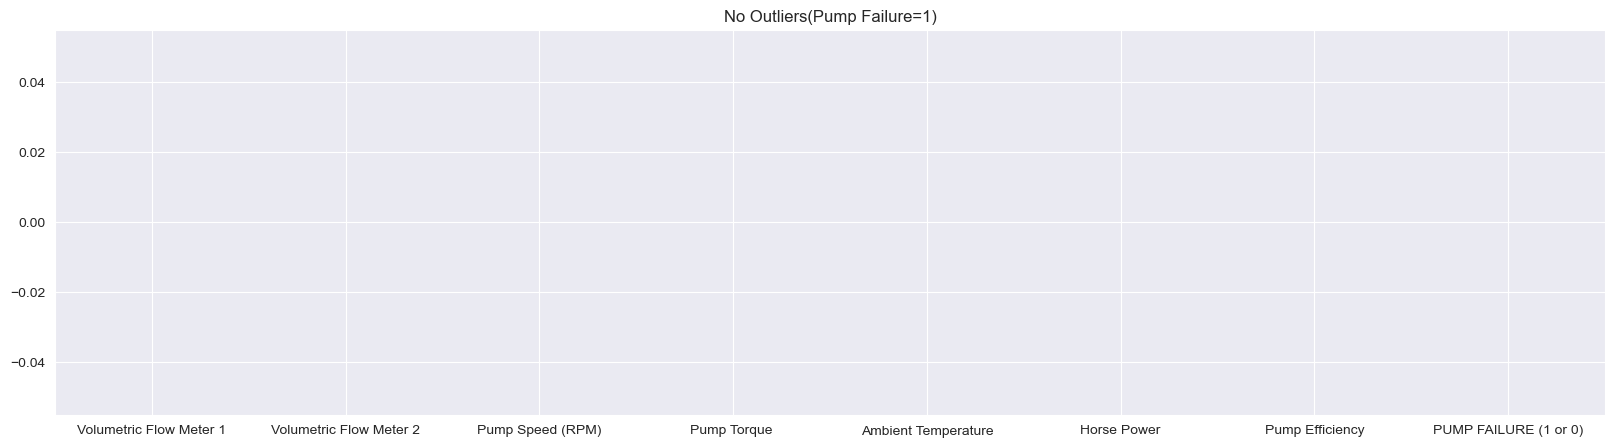

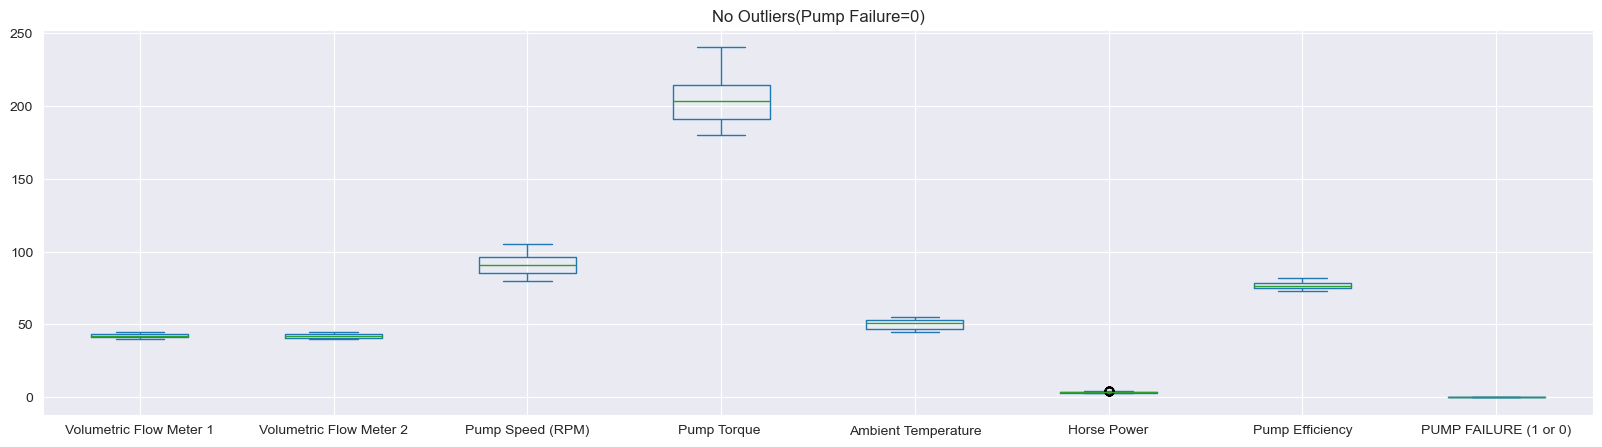

In [12]:
no_outliers=df_raw [~((df_raw < lower_limit) | ((df_raw > upper_limit))).any(axis=1) ]
no_outliers[no_outliers['PUMP FAILURE (1 or 0)']==1].plot(kind='box')
plt.title('No Outliers(Pump Failure=1)')
no_outliers[no_outliers['PUMP FAILURE (1 or 0)']==0].plot(kind='box')
plt.title('No Outliers(Pump Failure=0)')
plt.show()


### Plot and Examine Each Column

Plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.
Define a list variable called ListOfVariable containing the column names of all the numerical variables in the df_raw dataset 

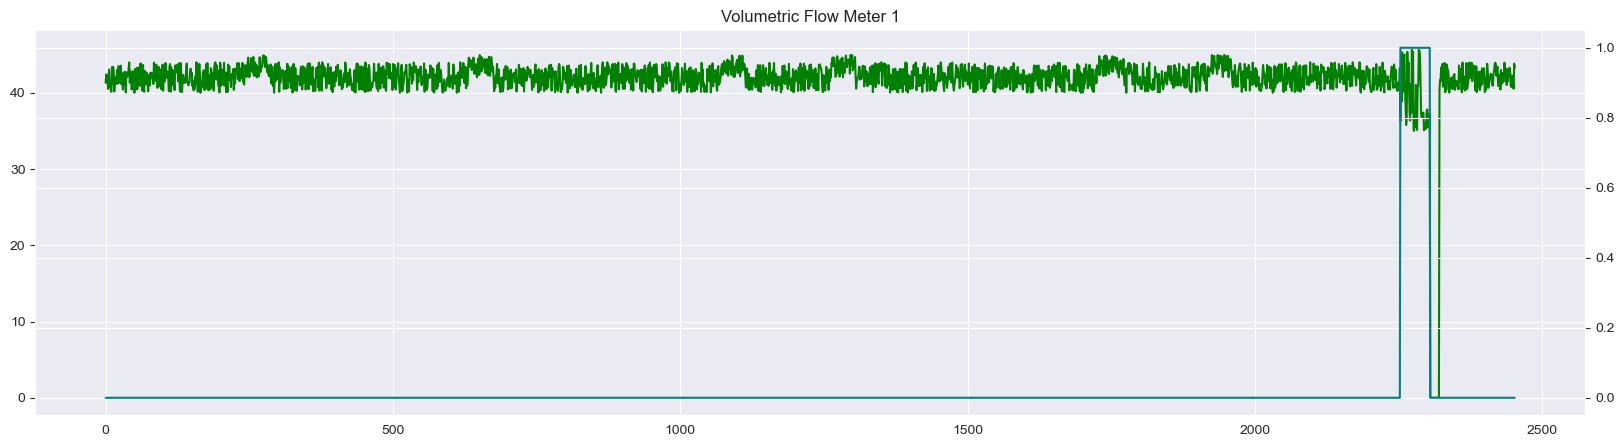

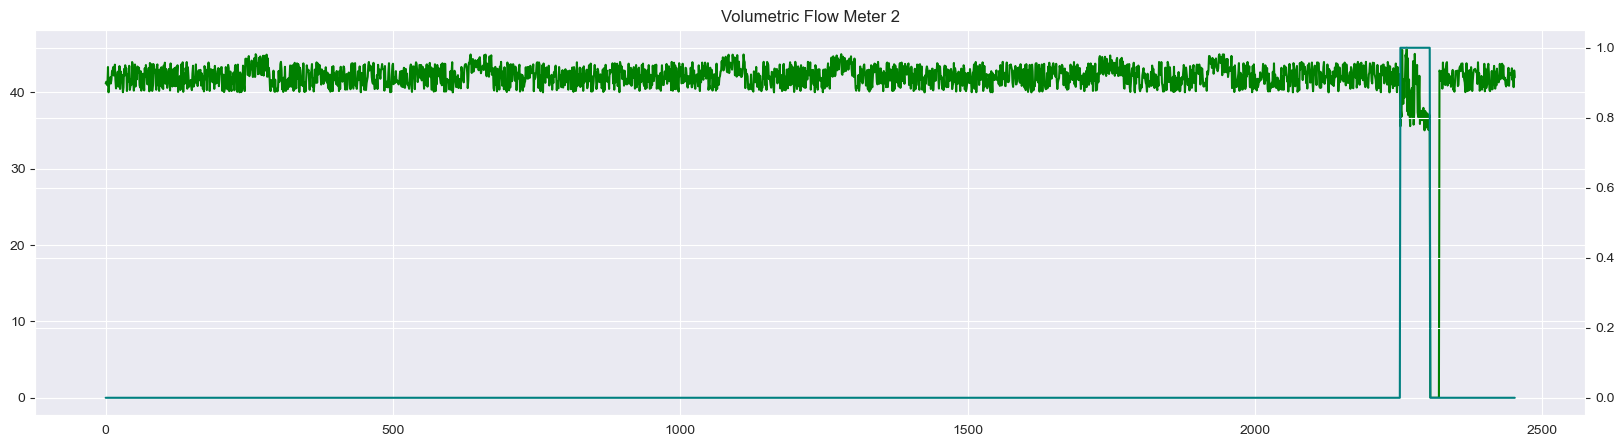

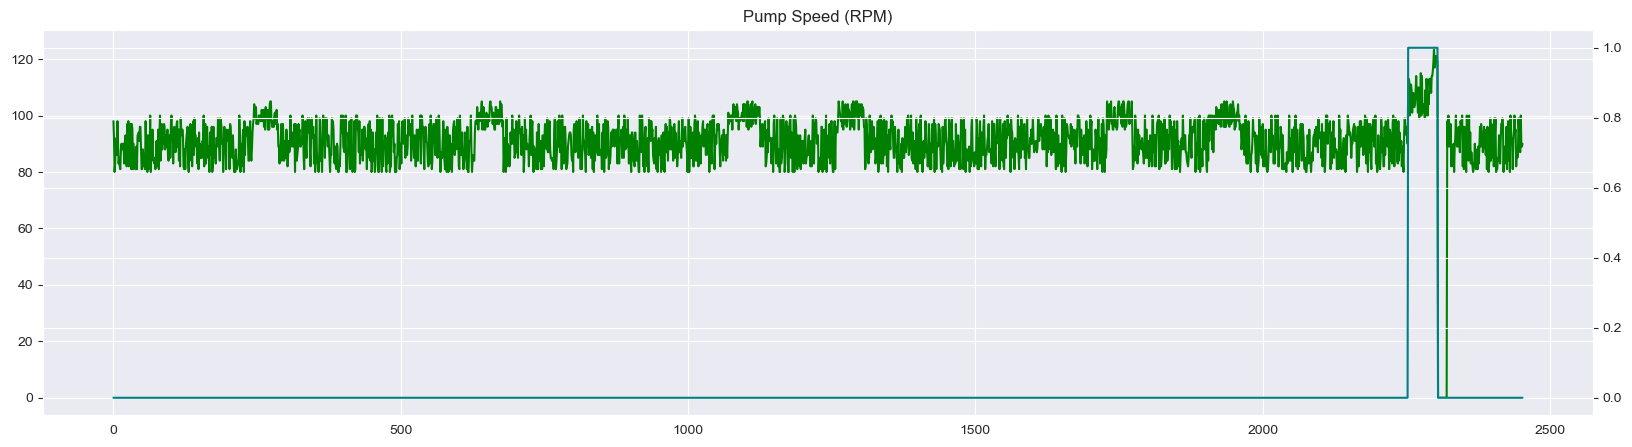

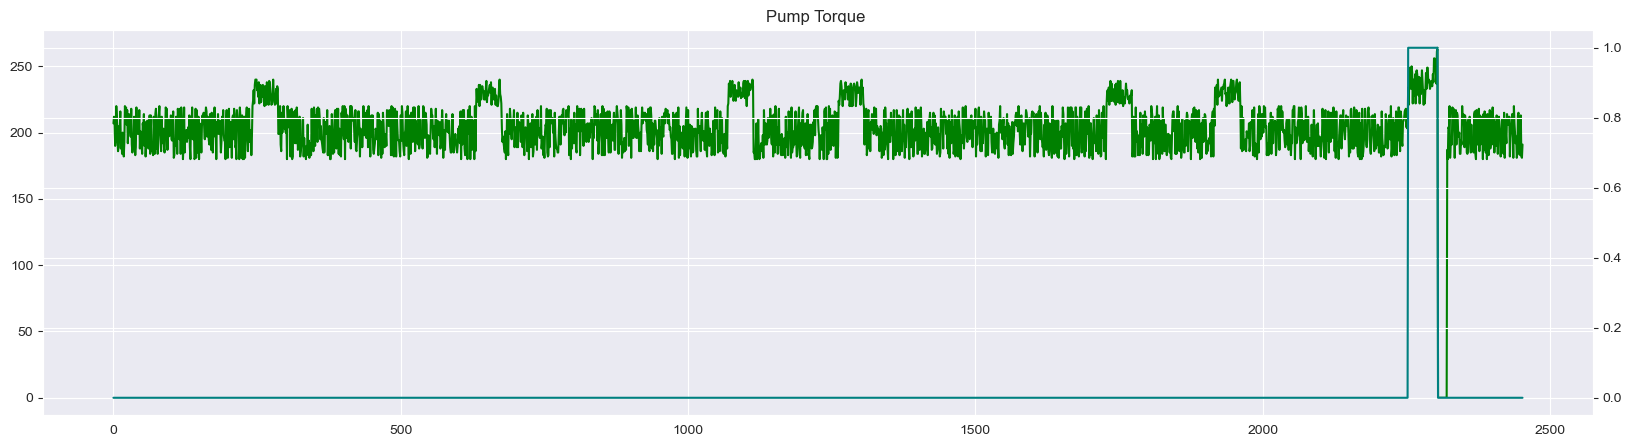

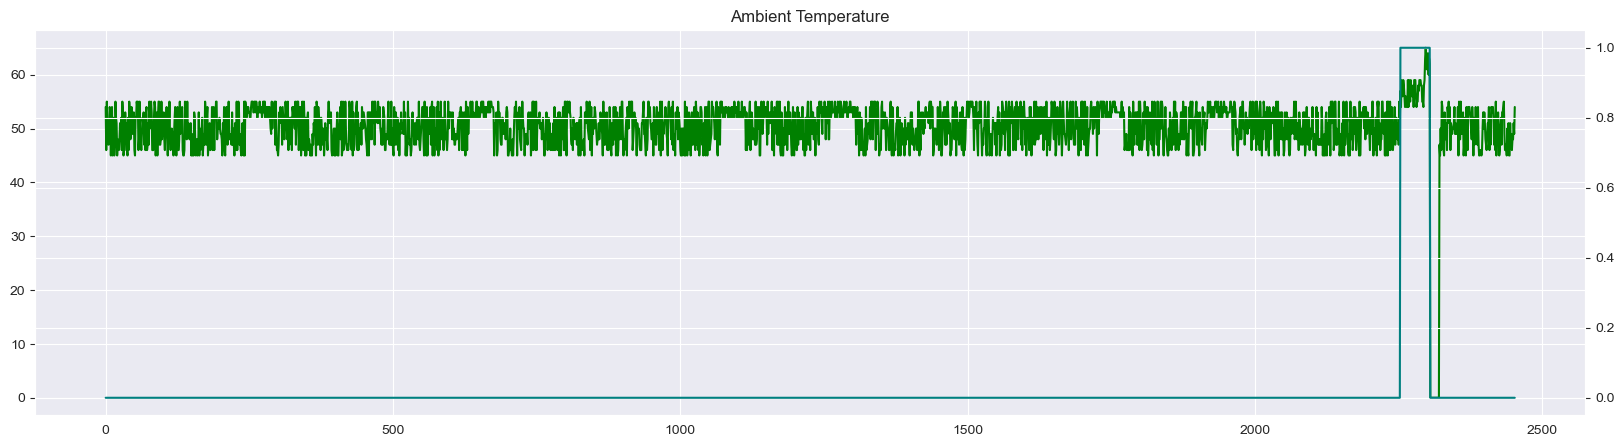

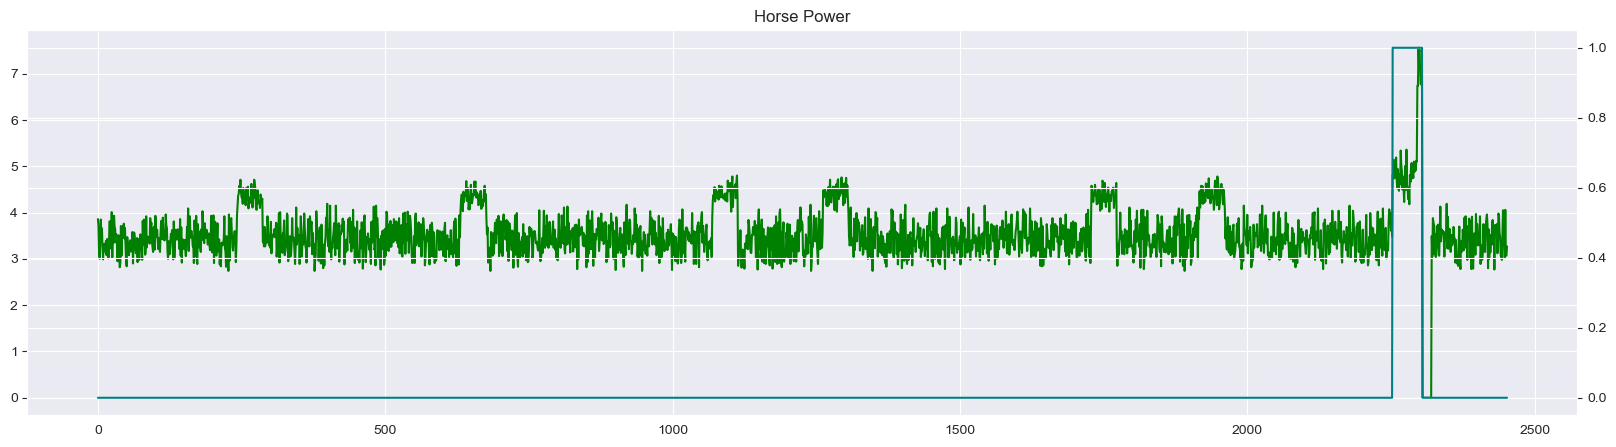

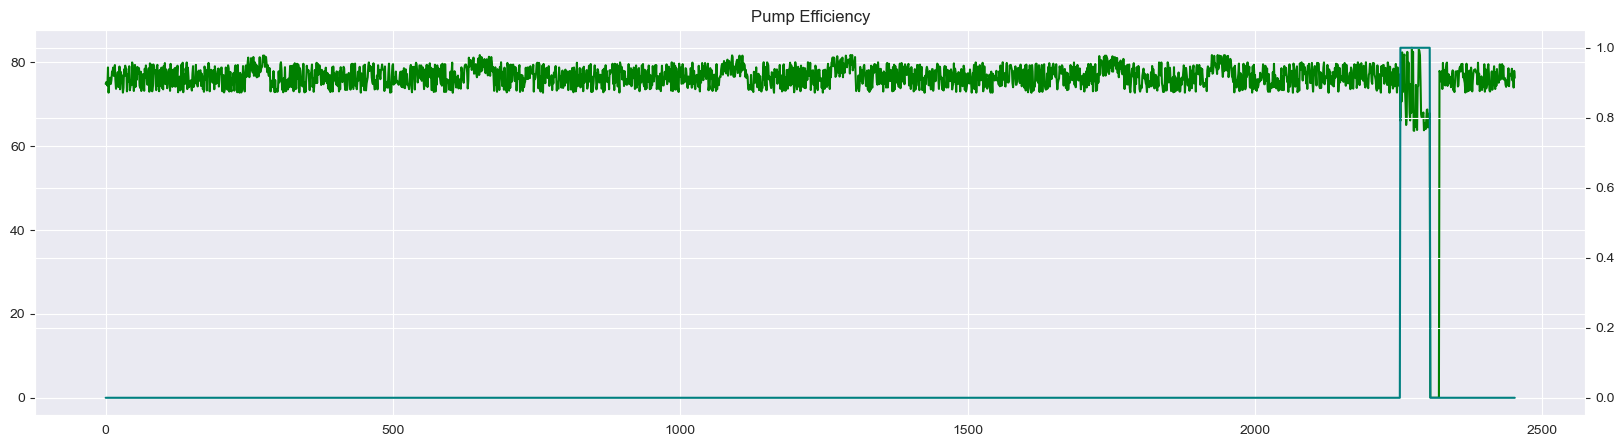

In [13]:
ListOfVariables=['Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 
       'Pump Speed (RPM)', 
       'Pump Torque ',
       'Ambient Temperature', 
       'Horse Power', 
       'Pump Efficiency']



for item in ListOfVariables:
    fig, ax1=plt.subplots()
    ax1.plot(df_raw.index, df_raw[item],color='green')
    ax2 = ax1.twinx()
    ax2.plot(df_raw.index, df_raw['PUMP FAILURE (1 or 0)'], color='teal')
    plt.title(item)

plt.show()


In [ ]:
# Significant changes in raw data when observed over the respective failure period of pump.

switch to using the df_std

### Create a Plot for Pump Failures Over a Rolling Time Period

i) Set the index of df_std dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables, Re-plot all the numerical variables in the df_std for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

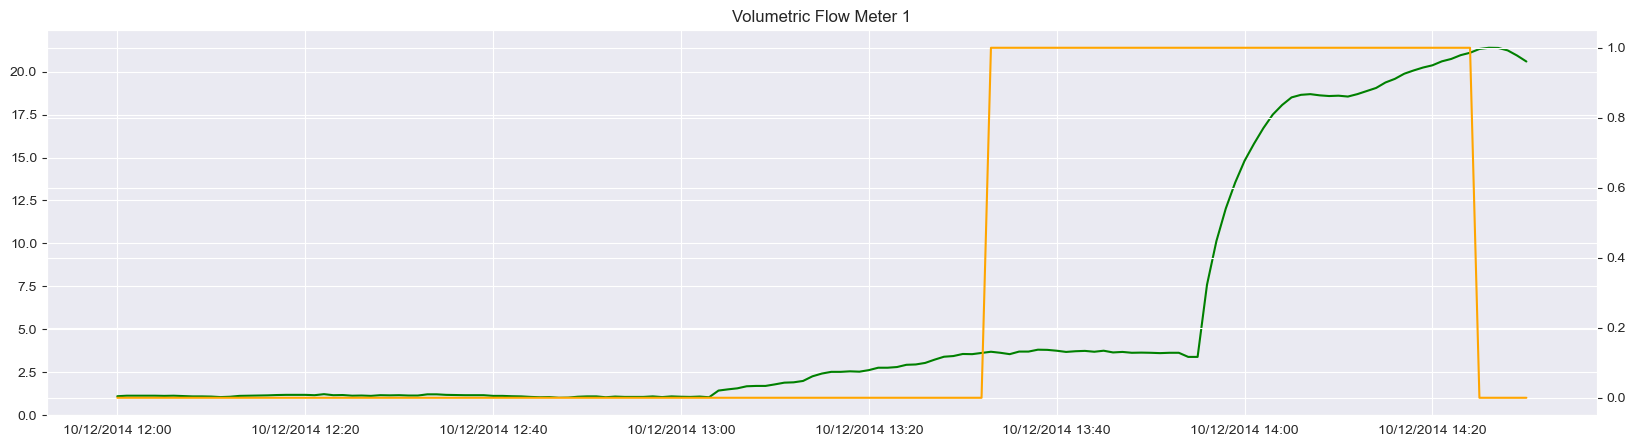

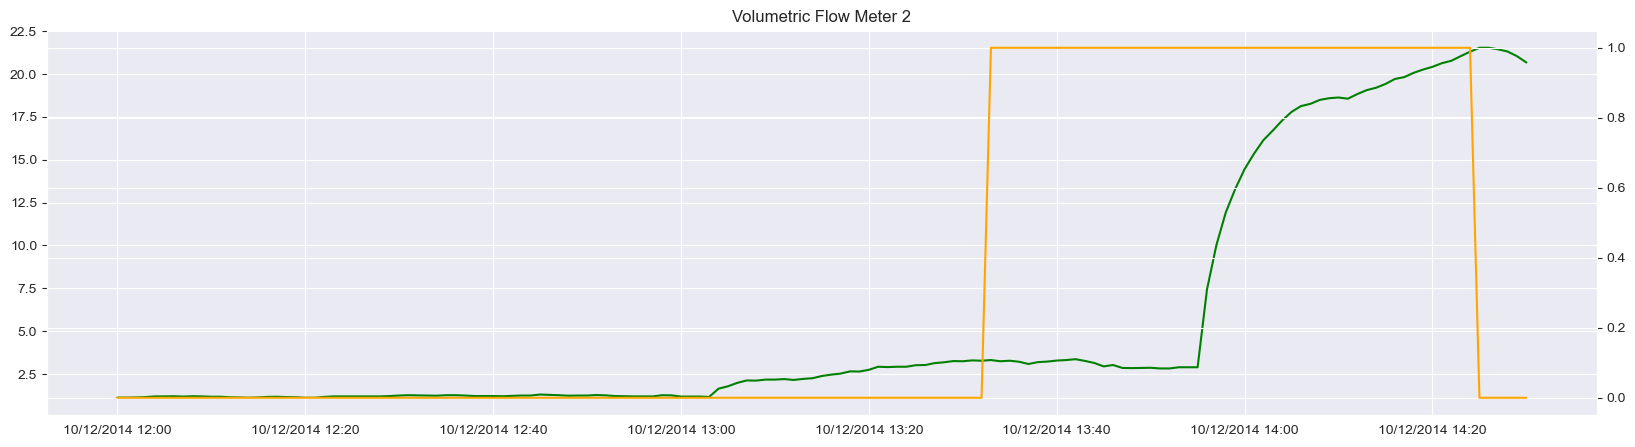

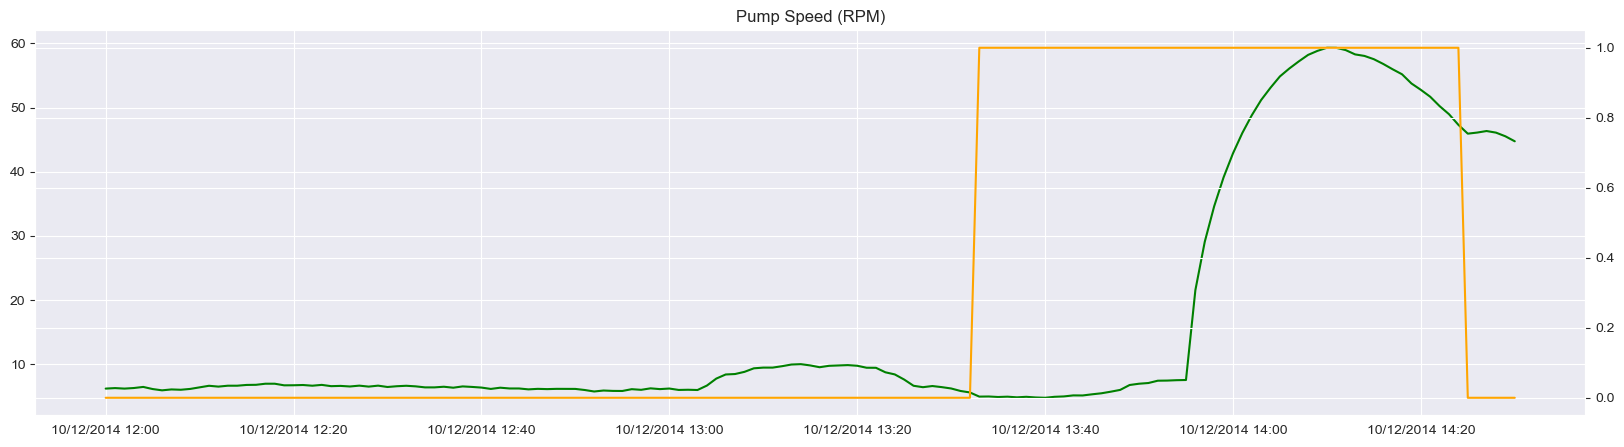

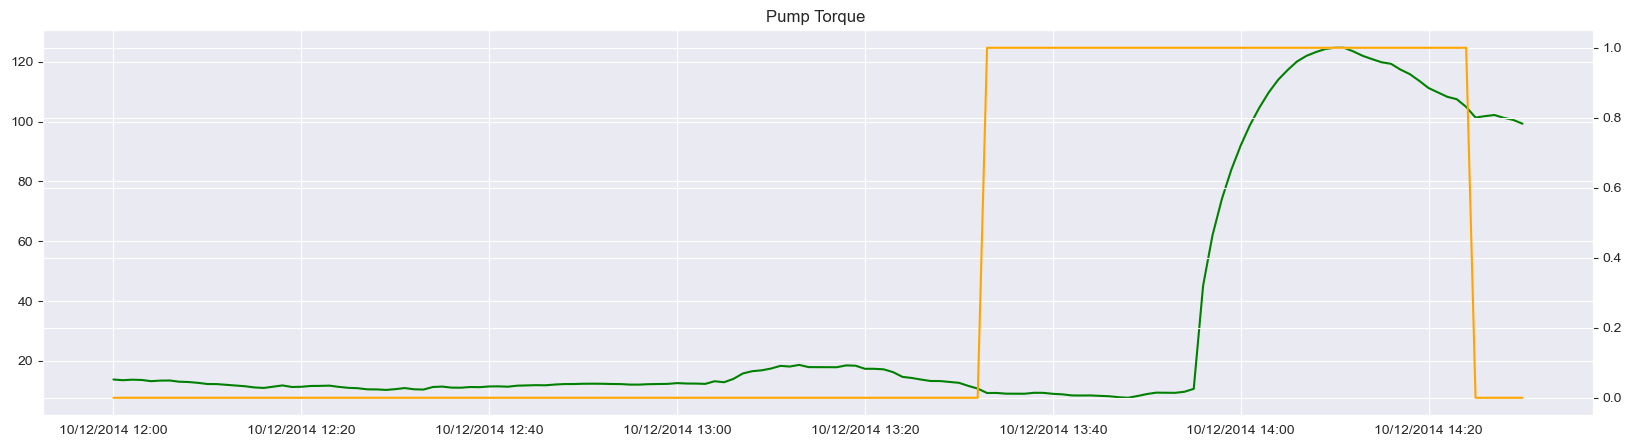

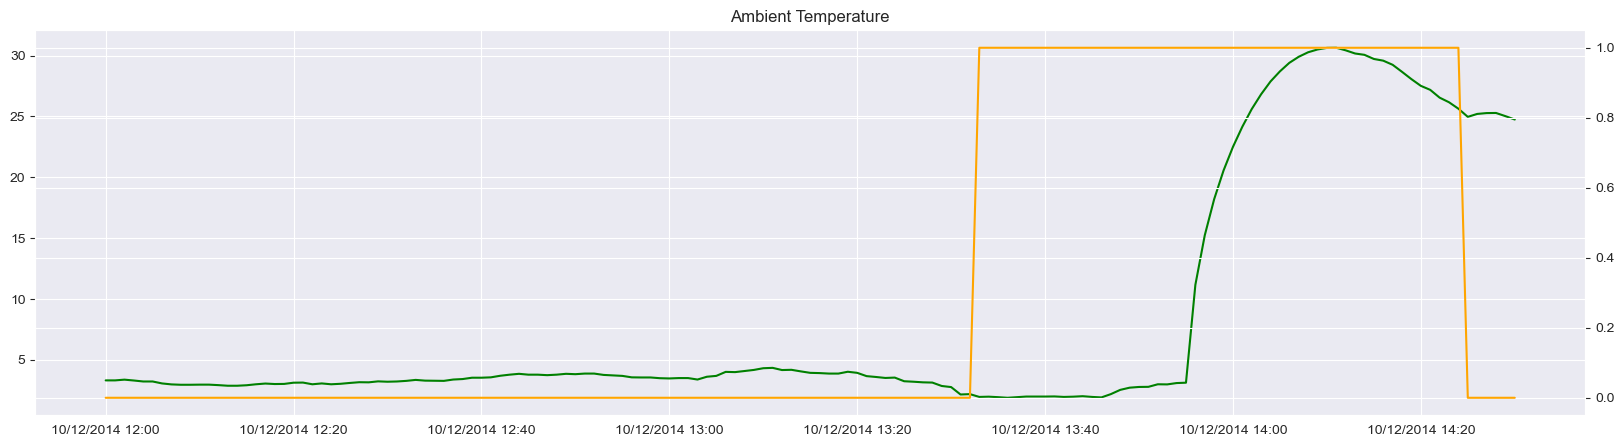

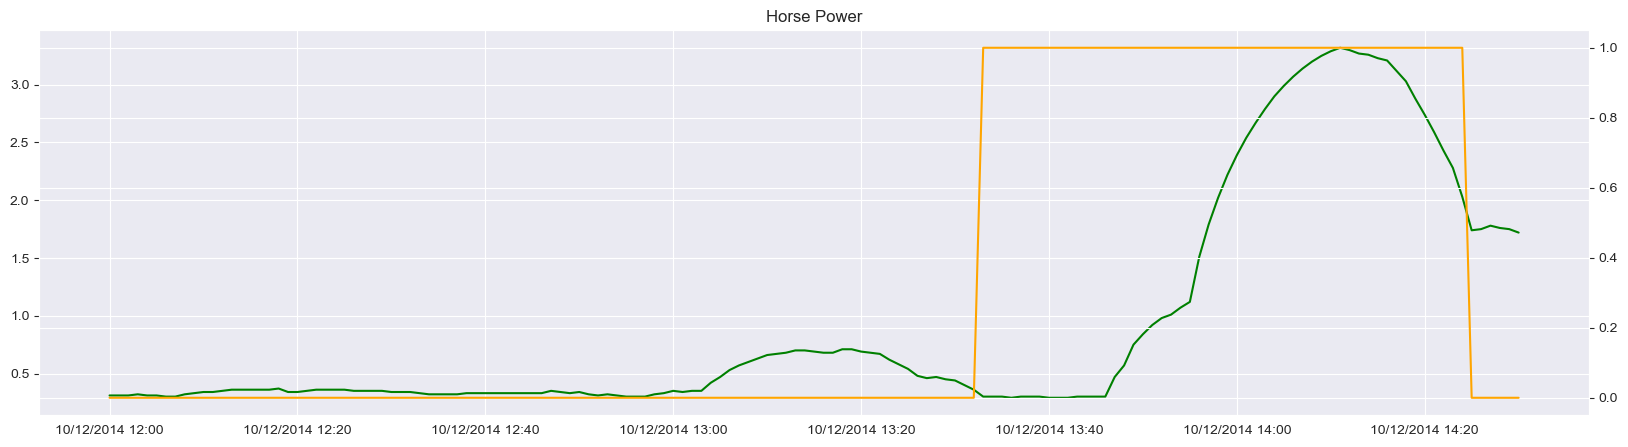

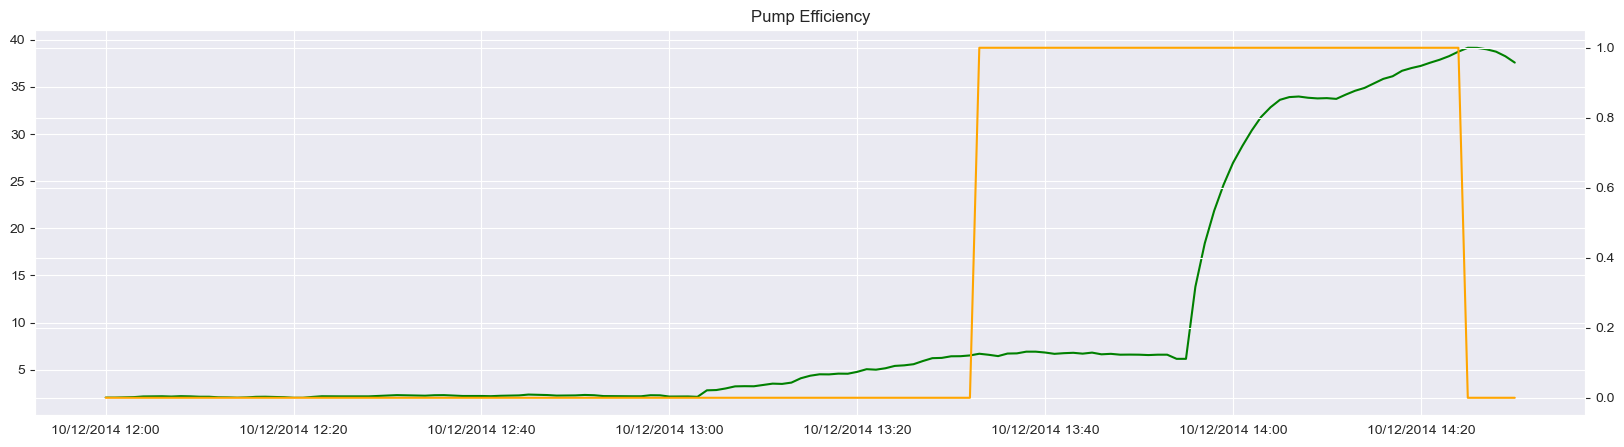

In [14]:
df_std_time_filtered = df_std[(df_std.index >= '10/12/2014 12:00') & (df_std.index <= '10/12/2014 14:30')]
for item in ListOfVariables:
    fig, ax1 = plt.subplots()
    ax1.plot(df_std_time_filtered.index, df_std_time_filtered[item],color='green') 
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2=ax1.twinx()
    ax2.plot(df_std_time_filtered.index, df_std_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
   
plt.show()

---

## Inferential Statistical Analysis

### Create a Heatmap
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the df_raw dataset.

<AxesSubplot:>

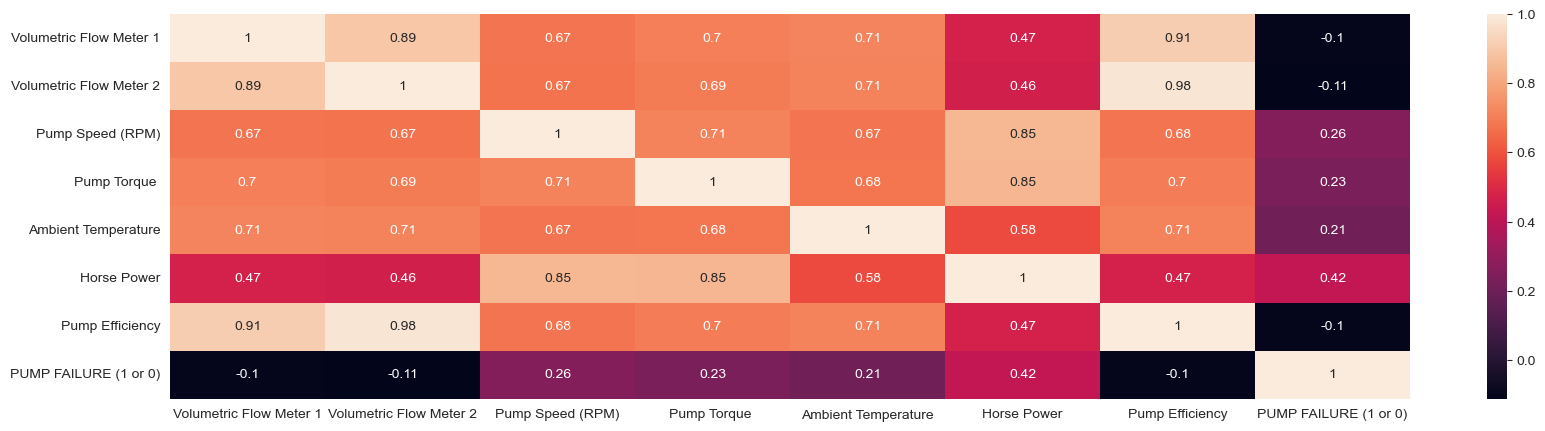

In [15]:
df_raw_corr = df_raw.corr()
sns.heatmap(df_raw_corr, annot=True)

In [ ]:
# Horse Power and Pump Speed, Pump Torque show a positive correlation in the raw data.

### Create a Barplot of Correlated Features
<b> i) Using the correlated DataFrame, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. 


In [16]:
df_raw_corr

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


<AxesSubplot:title={'center':'Correlated Bar Plot (Raw Data)'}>

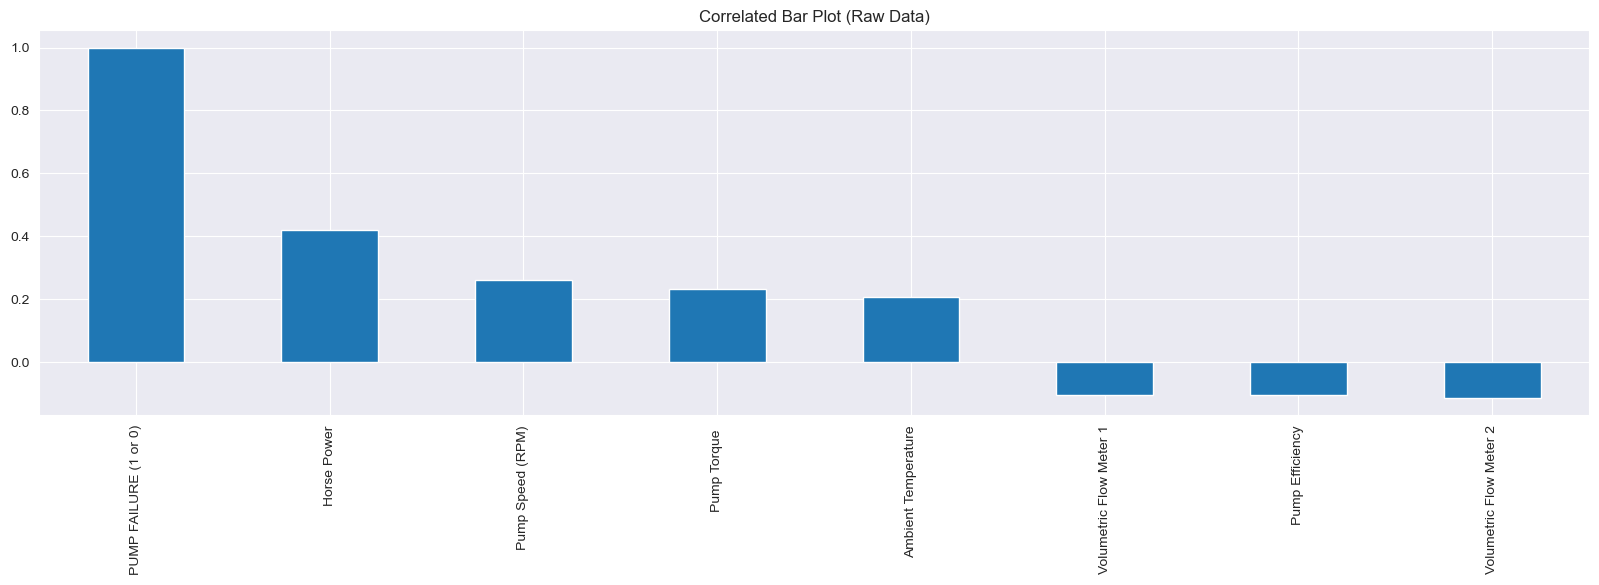

In [17]:
df_raw_corr['PUMP FAILURE (1 or 0)'].sort_values(ascending  = False).plot(kind='bar', title = 'Correlated Bar Plot (Raw Data)')

### Create a Rolling Standard Deviation Heatmap
correlations with the raw data weren't strong. Recreate a Heatmap using the df_std dataset 
 i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset.

<AxesSubplot:>

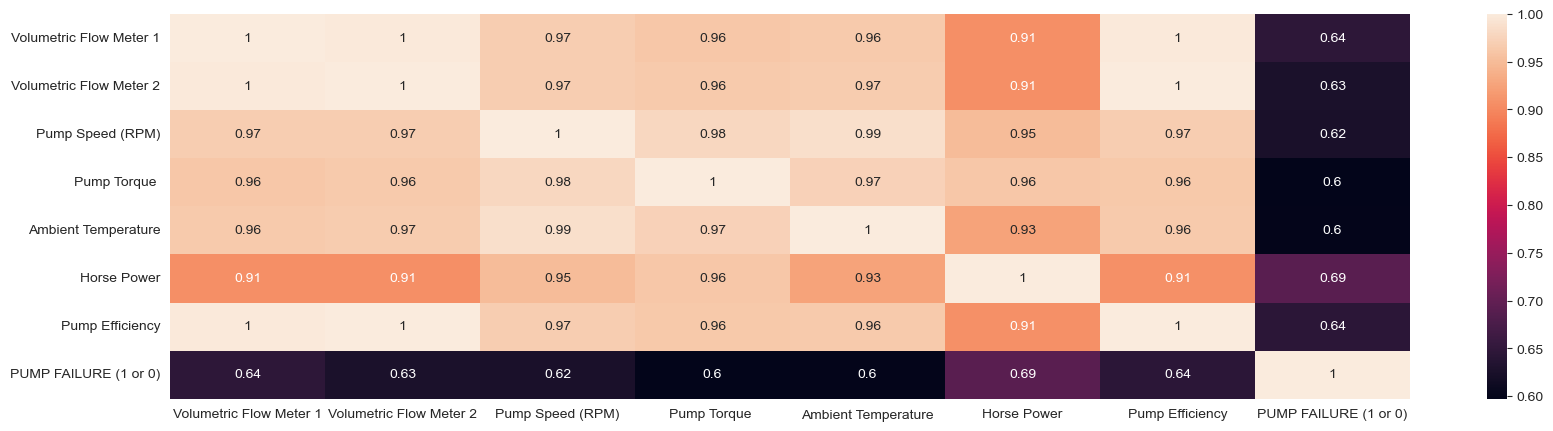

In [18]:
df_std_corr = df_std.corr()
sns.heatmap(df_std_corr, annot=True)

In [ ]:
# Horse Power stand out

### Create a multivariate regression model
 i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all the independent variables in the df_raw dataset. 
 ii) use the df_std create a regression model

In [19]:
#df_Raw
independent_variables_raw = df_raw[ListOfVariables]
dependent_variables_raw = df_raw['PUMP FAILURE (1 or 0)']
independent_variables_raw = sm.add_constant(independent_variables_raw)
regression_model_raw = sm.OLS(dependent_variables_raw,independent_variables_raw).fit() 
regression_model_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 23 Feb 2023   Prob (F-statistic):          5.58e-233
Time:                           05:24:52   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#df_Std
independent_variables_std=df_std[ListOfVariables]
dependent_variables_std=df_std['PUMP FAILURE (1 or 0)']
independent_variables_std = sm.add_constant(independent_variables_std)
regression_model_std = sm.OLS(dependent_variables_std,independent_variables_std).fit() 
regression_model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                           05:24:53   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the df_std model, the R-squared value is 0.778, indicating that the model explains 77.8% of the variation in the dependent variable. Indicates that the model is a good fit.

### Analysis of Coefficients 
 i) Using the .params method, extract the Coefficients from the regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. 

<AxesSubplot:title={'center':'Regression Coefficient for Pump Failure'}>

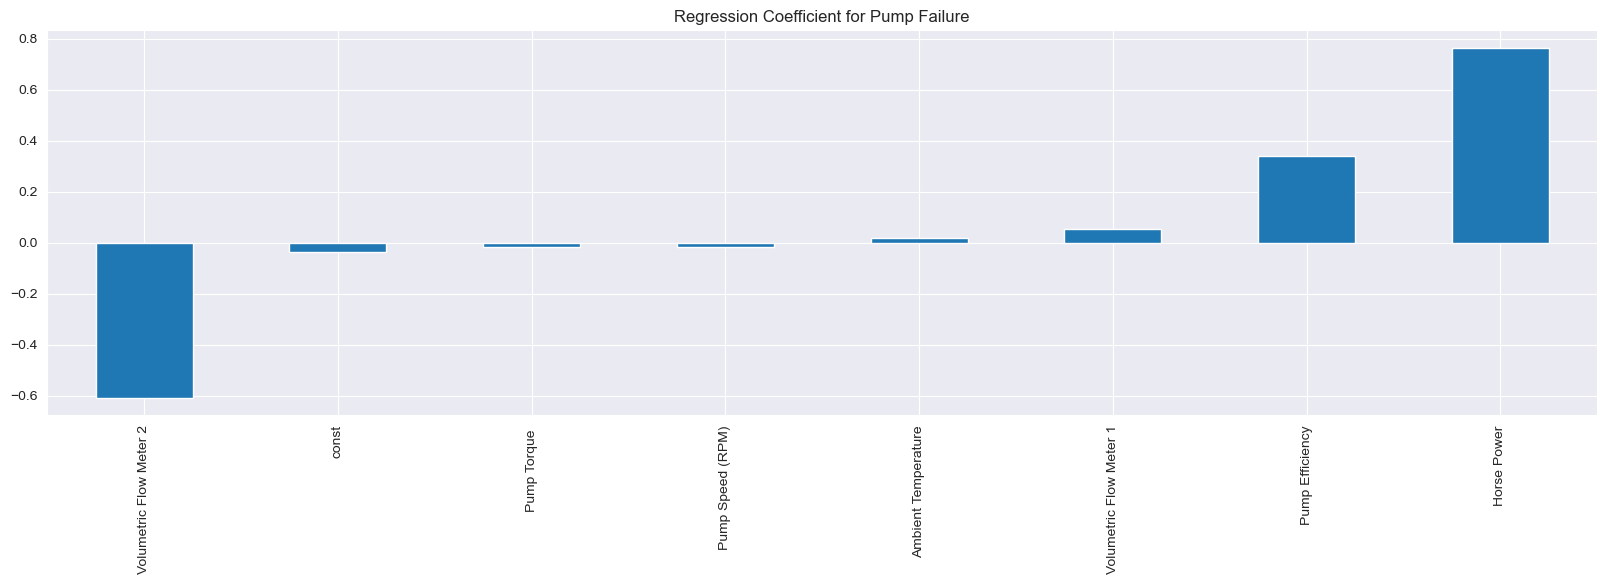

In [21]:
regression_model_std.params.sort_values(ascending = True).plot(kind='bar', title = 'Regression Coefficient for Pump Failure')

### Validate Predictions

i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation and apply the .predict() function to the independent variables in the df_std dataset.
    
iii) Create a Dual-Axis Plot with the following axes items: 

In [35]:
df_std['Prediction']=regression_model_std.predict(independent_variables_std)
df_std.head(3)

,Data Source,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0),Prediction
TIMEFRAME (DD/MM/YYYY),,,,,,,,,,
9/12/2014 0:00,Rolling Stdev (30 Minute),1.04,0.96,5.54,11.70,3.40,0.32,1.74,0,0.012455
9/12/2014 0:01,Rolling Stdev (30 Minute),1.06,1.01,5.49,11.73,3.36,0.31,1.83,0,0.005693
9/12/2014 0:02,Rolling Stdev (30 Minute),1.06,1.03,5.62,11.94,3.40,0.31,1.87,0,0.001593


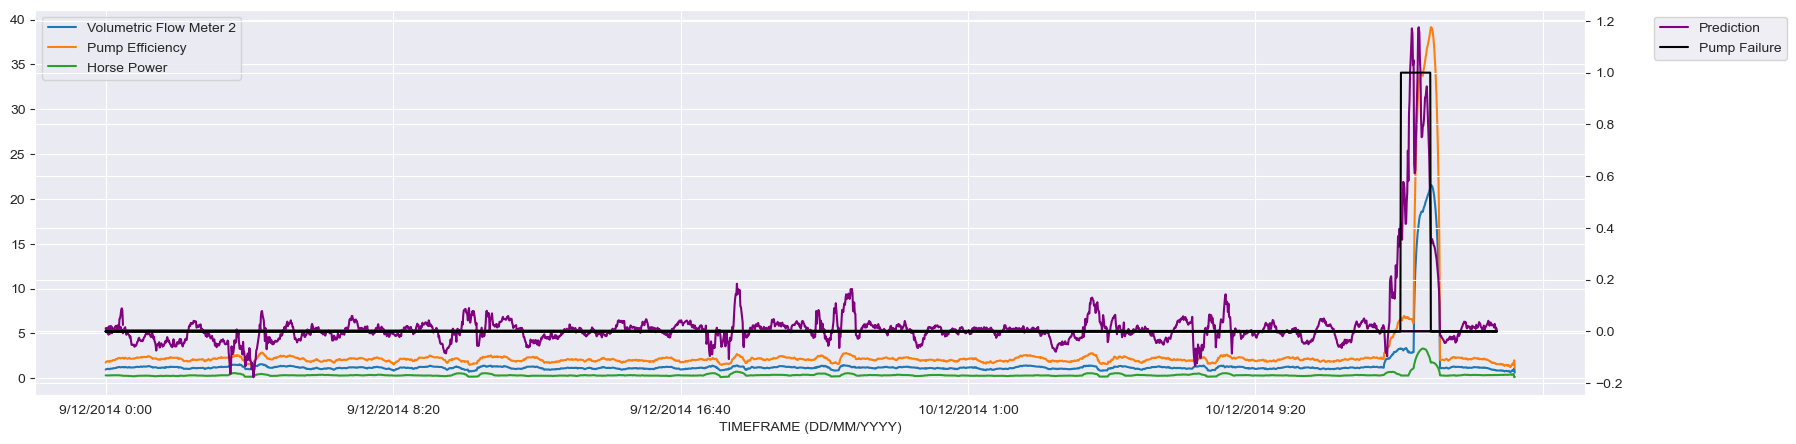

In [68]:
ax1=df_std[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']].plot()
ax1.legend()
ax2=ax1.twinx()
ax2.plot(df_std['Prediction'], color='purple', label='Prediction')
ax2.plot(df_std['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
ax2.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.show()

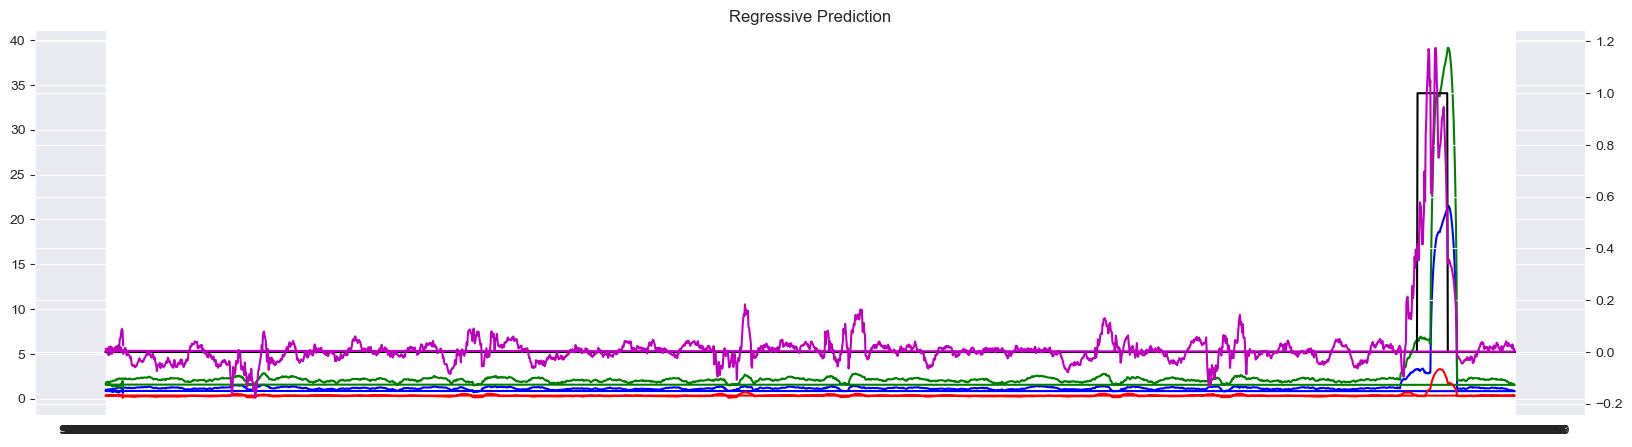

In [62]:
fig,ax1=plt.subplots()
ax1.plot(df_std.index, df_std['Volumetric Flow Meter 2'],label = 'Volumetric Flow Meter 2', color='b')
ax1.plot(df_std.index, df_std['Pump Efficiency'],label = 'Pump Efficiency', color='g')
ax1.plot(df_std.index, df_std['Horse Power'], label = 'Horse Power', color='r')
ax2 = ax1.twinx()
ax2.plot(df_std.index, df_std['PUMP FAILURE (1 or 0)'],label = 'PUMP FAILURE (1 or 0)', color='k')
ax2.plot(df_std.index, df_std['Prediction'],label = 'Prediction', color='m')
plt.title('Regressive Prediction')
plt.show()